In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import glob
import os
import peakutils
import datetime
import warnings
from jupyterthemes import jtplot

import logging

In [3]:
logging.getLogger().setLevel(logging.CRITICAL)
warnings.filterwarnings("ignore")

from xps.xps_sw import *
from xps.xps_import import *
from xps.xps_analysis import *
from xps.xps_bg import *

In [4]:
jtplot.style('default', grid=False)
plt.rcParams['errorbar.capsize'] = 8
plt.rcParams['font.size'] = 18
plt.rc('font', size= 18)
plt.rc('legend', fontsize= 15)
plt.rc('xtick', labelsize= 18)
plt.rc('ytick', labelsize= 18)
plt.rc('axes', labelsize=18)
plt.rc('axes', titlesize=18)

In [5]:
asf = dict({'C_1s' : 0.296, 'O_1s' : 0.711, 'N_1s' : 0.477, 'Ba_3d' : 7.49,
            'Cu_2p' : 5.321, 'Cl_2p' : 0.891})
asf2 = {'Ba_3d_5/2' : 25.8, 'Ba_3d_3/2': 17.9, 'Ba_4d': 5.86, 'Cl_2p': 2.28, 'Cl_2s': 1.69}

In [6]:
Na = 6.023e23
M = 529
R = 7.33e-8 # cm
rho = M/Na/(4*np.pi/3*R**3)
rho

0.5324051841398443

In [6]:
V = 4*np.pi/3*R**3 #cm^3
V

1.6496831299488353e-21

# Analysis experiments on Cu from January/February 2021

## Read processed experiments

In [116]:
path = '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_0*/**/*.sxy'

files = glob.glob(path, recursive=True)
files.sort()
files_new = []

for f in files:
    files_new.append(f)
        
files = files_new
files

['/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_01_18_Cu/proc/20210119_7-Cu_FBI_subl_05min.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_01_18_Cu/proc/20210119_7-Cu_FBI_subl_10min.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_01_18_Cu/proc/20210119_7-Cu_FBI_subl_15min.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_01_18_Cu/proc/20210119_7-Cu_FBI_subl_20min.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_01_18_Cu/proc/20210119_7-Cu_clean.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_01_21_Cu/proc/20210121_8-Cu_FBI_subl_05min.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_01_21_Cu/proc/20210121_8-Cu_clean.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_01_21_Cu/proc/20210122_8-Cu_FBI_subl_15min.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_01_21_Cu/proc/20210122_8-Cu_FBI_subl_60min.sxy',
 '/Users/pabloherrero/sabat/

In [117]:
fbi_exps = []
ba_exps = []
for f in files:
    if ('FBI_subl_' in f) and ('BaCl2' not in f):
        fbi_exps.append(read_processed_xp(f))
    elif 'BaCl2' in f:
        ba_exps.append(read_processed_xp(f))

clean_exps = []
for f in files:
    if 'clean' in f:
        clean_exps.append(read_processed_xp(f))

/Users/pabloherrero/sabat/sabatsw/xps/xps_analysis.py:67: RuntimeWarning: invalid value encountered in greater
  dropup = np.where(xp.dfx[region].energy.values > eup)[0]
/Users/pabloherrero/sabat/sabatsw/xps/xps_bg.py:411: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dfWhole['counts'].loc[:edw] = dfshort.dropna()['counts'].loc[:edw]   # Update the values of the tail


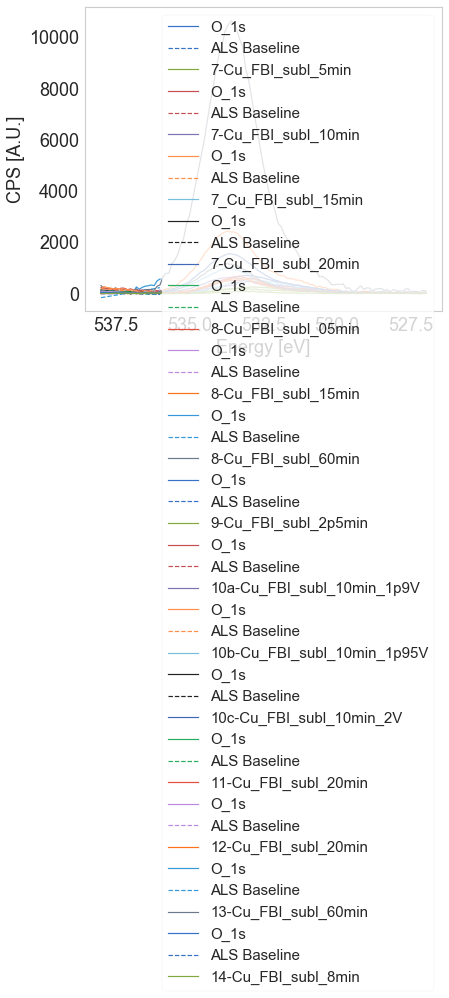

In [118]:
for xp in fbi_exps:
    fix_tail_bg(xp, region='O_1s', edw=536, eup=None, inplace=True)

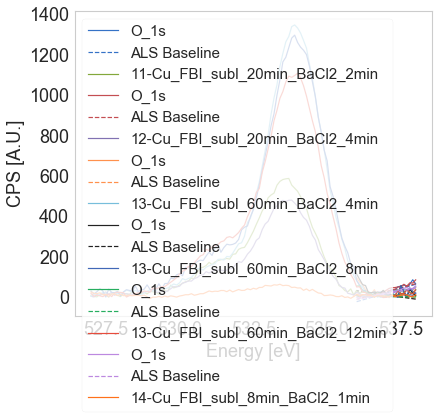

In [119]:
for xp in ba_exps:
    fix_tail_bg(xp, region='O_1s', edw=536, eup=None, inplace=True)

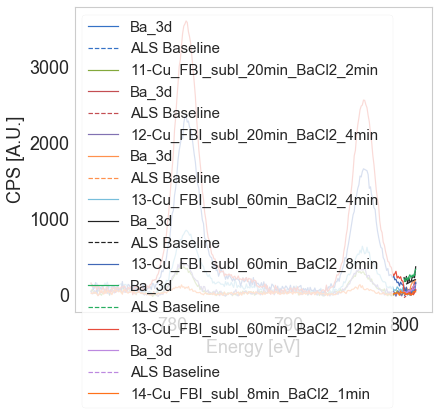

In [121]:
for xp in ba_exps:
    fix_tail_bg(xp, region='Ba_3d', edw=800, eup=None, inplace=True)

In [124]:
for xp in ba_exps:
    trim_spectra(xp, xpRef=ba_exps[2], region='Cl_2p', inplace=True)

## Show individual plots

In [41]:
regions = proc_exps[0].dfx.columns.levels[0].values
regions= ['N_1s', 'C_1s', 'O_1s', 'Ba_3d', 'Cl_2p', 'Cu_2p']

In [85]:
proc_exps[0].color, proc_exps[0].name

('k', '1-Cu_clean')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a237a0908>,
      dtype=object)

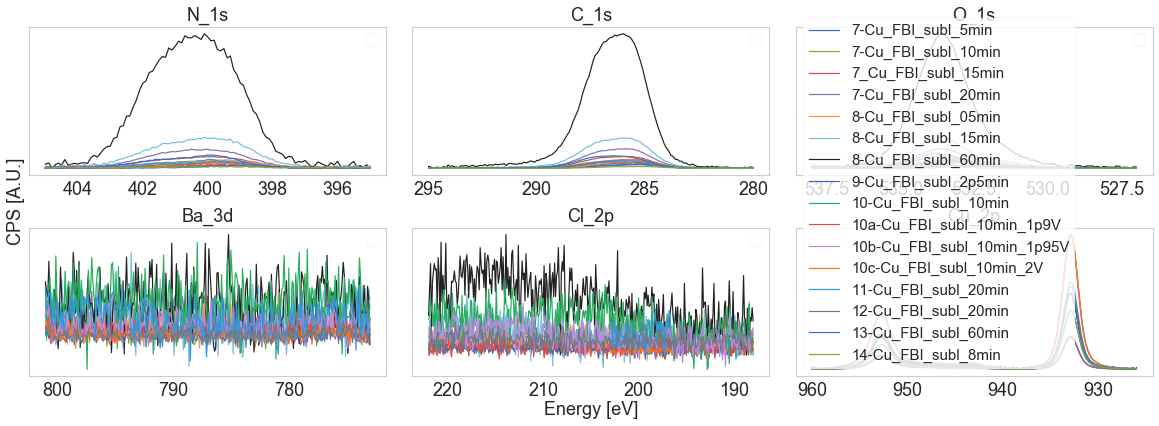

In [44]:
plot_xp_regions(fbi_exps, regions, ncols=3)
# plt.gcf().set_size_inches(20,10)
# plt.gcf().savefig('/Users/pabloherrero/Dropbox/phd/papers/fbi_cu_sublimation/FBI_Ba_reproducibility2.png', dpi=200)

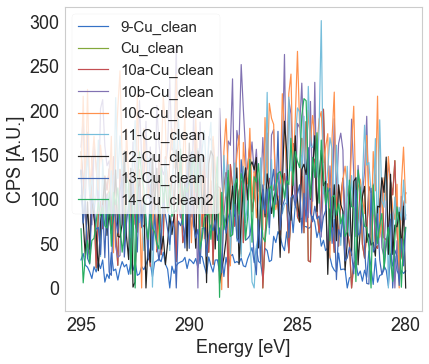

In [18]:
for xp in clean_exps[2:]:
    plot_region(xp, 'C_1s')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2b21a4a8>,
      dtype=object)

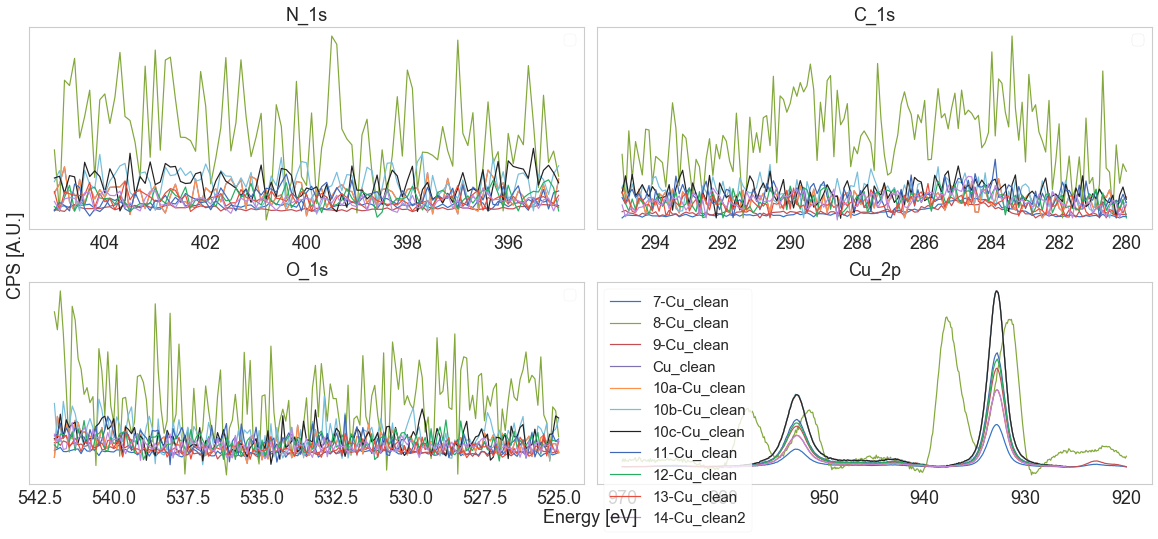

In [21]:
plot_xp_regions(clean_exps, regions, ncols=2)

### Normalized spectra

In [63]:
selection[4].path

'/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_02_03_Cu/proc/20210203_13-Cu_FBI_subl_60min.sxy'

In [66]:
selection = [xp for xp in fbi_exps if ('20min' in xp.path) or ('60min' in xp.path)]
regions= ['N_1s', 'C_1s', 'O_1s', 'Cu_2p']

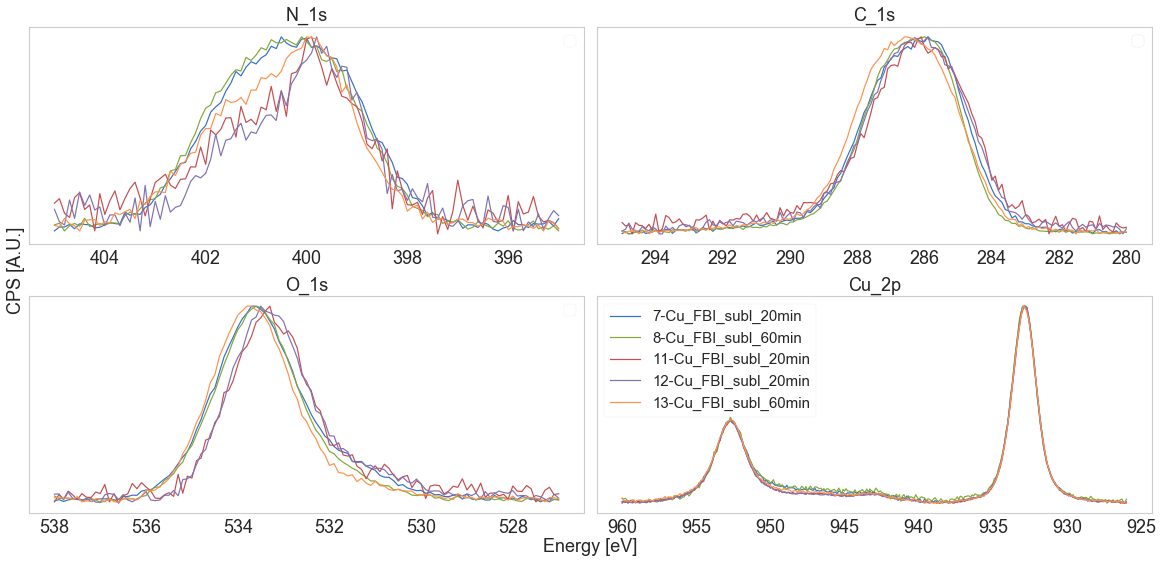

In [72]:
plot_normal_regions(selection, regions, ncols=2)
plt.gcf().savefig('/Users/pabloherrero/Dropbox/phd/papers/fbi_cu_sublim_v2/FBI_reproducibility.png', dpi=200)

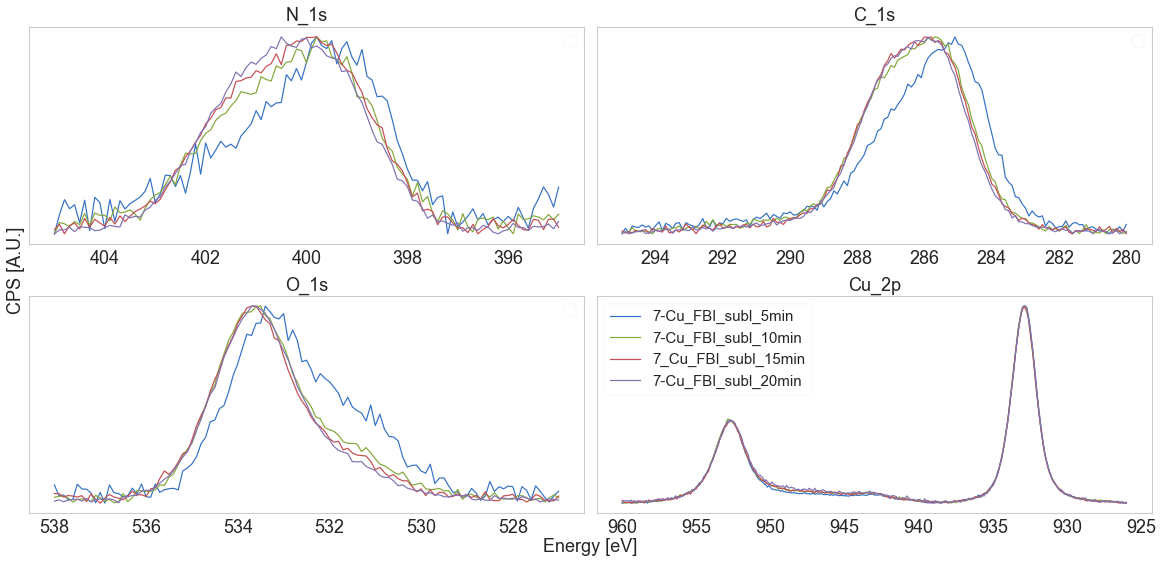

In [13]:
selection = [xp for xp in fbi_exps if ('7-' in xp.path)]
regions= ['N_1s', 'C_1s', 'O_1s', 'Cu_2p']

plot_normal_regions(selection, regions, ncols=2)
plt.gcf().savefig('/Users/pabloherrero/Dropbox/phd/papers/fbi_cu_sublim_v2/FBI_growth.png', dpi=200)

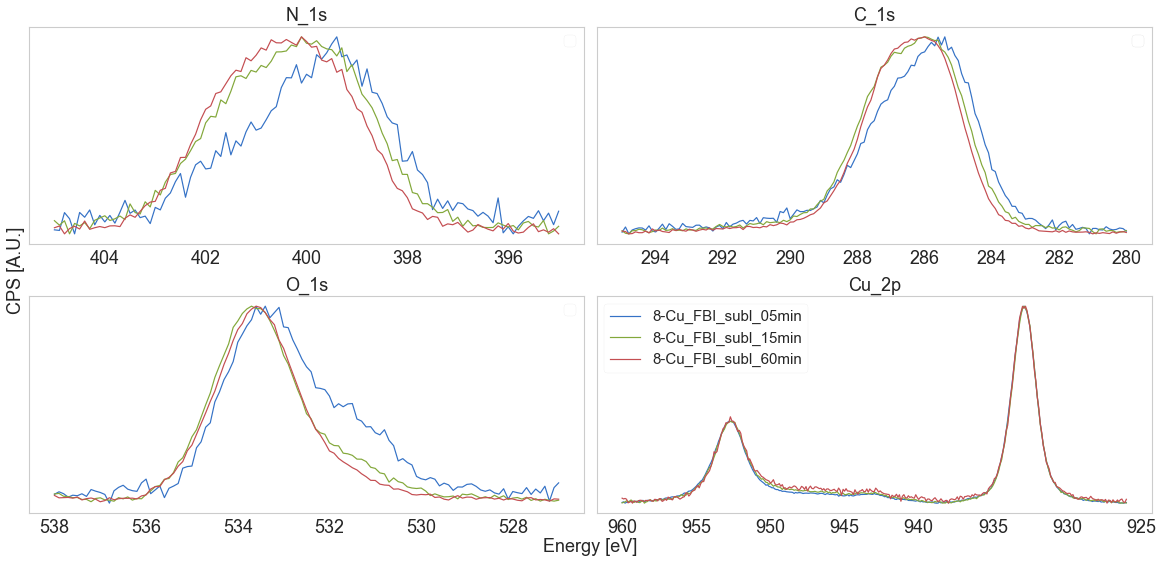

In [14]:
selection = [xp for xp in fbi_exps if ('8-' in xp.path)]
plot_normal_regions(selection, regions, ncols=2)
plt.gcf().savefig('/Users/pabloherrero/Dropbox/phd/papers/fbi_cu_sublim_v2/FBI_growth2.png', dpi=200)

### Barium experiments

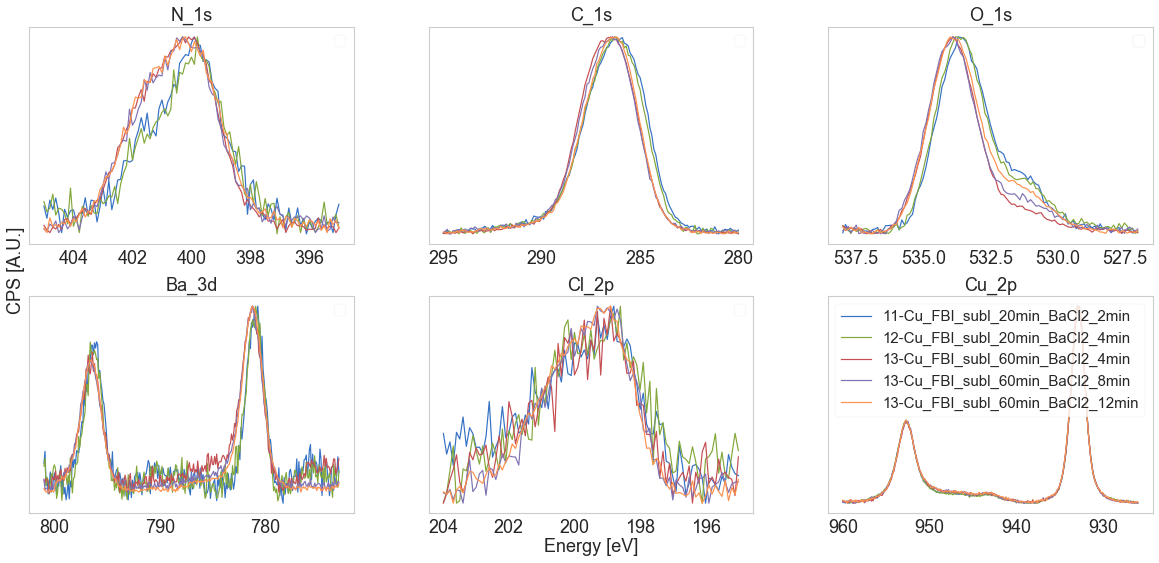

In [126]:
regions= ['N_1s', 'C_1s', 'O_1s', 'Ba_3d', 'Cl_2p', 'Cu_2p']
plot_normal_regions(ba_exps[:-1], regions)
plt.gcf().savefig('/Users/pabloherrero/Dropbox/phd/papers/fbi_cu_sublim_v2/FBI_Ba_reproducibility.png', dpi=200)

## Integrate areas 

### C 1s

/Users/pabloherrero/sabat/sabatsw/xps/xps_analysis.py:67: RuntimeWarning: invalid value encountered in greater
  dropup = np.where(xp.dfx[region].energy.values > eup)[0]


[1520.3176728543683,
 3291.7842669918655,
 4635.965904274856,
 7408.170338113546,
 3392.3069074035166,
 11679.26690520929,
 47468.515136231836,
 1474.3428357638202,
 2362.2040453305694,
 2732.990369256899,
 3374.849653703475,
 3232.385631077618,
 2629.97366743578,
 4835.082190737678,
 793.7423081847319]

<Figure size 460.8x403.2 with 0 Axes>

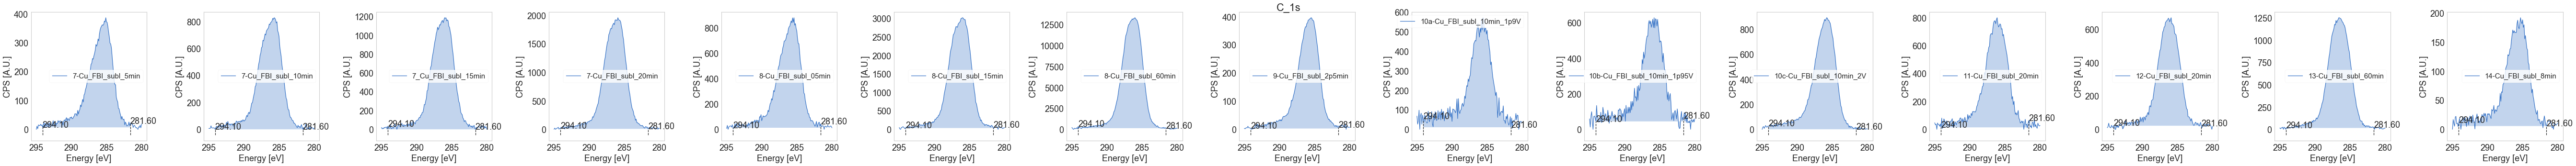

In [78]:
region = 'C_1s'
integrateRegions(fbi_exps, region, indRef=1, asf=asf)

/Users/pabloherrero/sabat/sabatsw/xps/xps_analysis.py:67: RuntimeWarning: invalid value encountered in greater
  dropup = np.where(xp.dfx[region].energy.values > eup)[0]


[3053.7192740386054,
 2517.6433113211433,
 6322.419026601045,
 6038.3779637702855,
 6507.165008230549,
 799.9553653535162]

<Figure size 460.8x403.2 with 0 Axes>

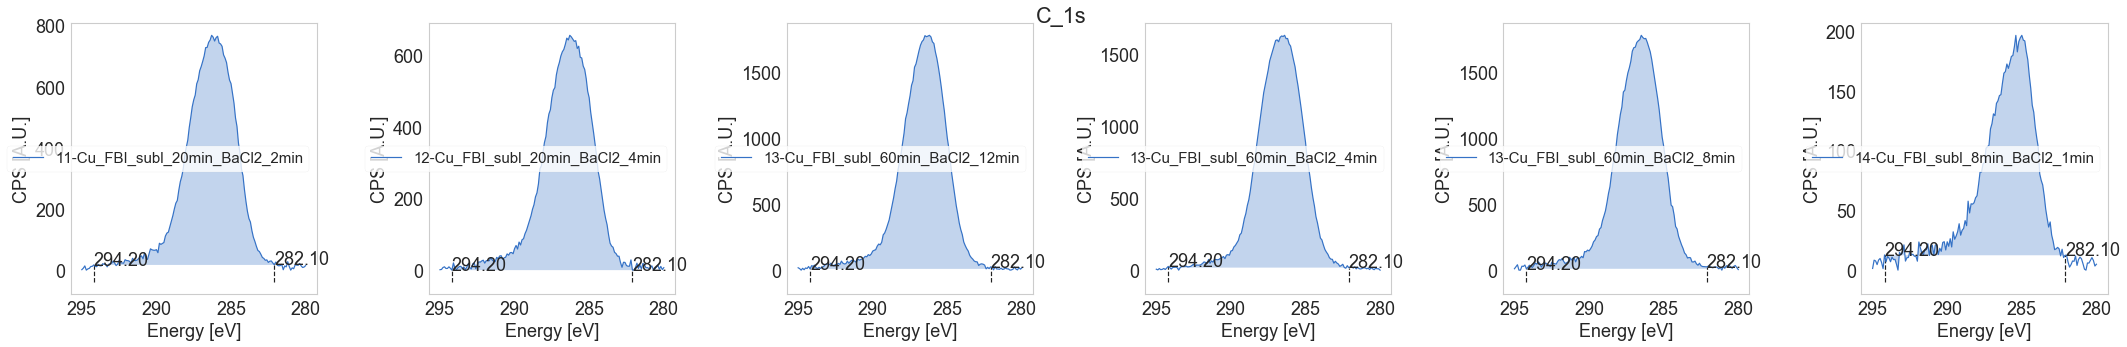

In [107]:
region = 'C_1s'
integrateRegions(ba_exps, region, indRef=1, asf=asf)

### O 1s

[623.4494482547003,
 1766.7804809926079,
 2616.159105244074,
 4047.290242567398,
 1662.805550942642,
 6335.926762325807,
 25817.64636685818,
 783.897039024485,
 1580.5822485060924,
 1739.4942870865552,
 2059.1249594219566,
 1724.1324988351378,
 1441.7557588246923,
 2809.363798374434,
 208.59565014386214]

<Figure size 460.8x403.2 with 0 Axes>

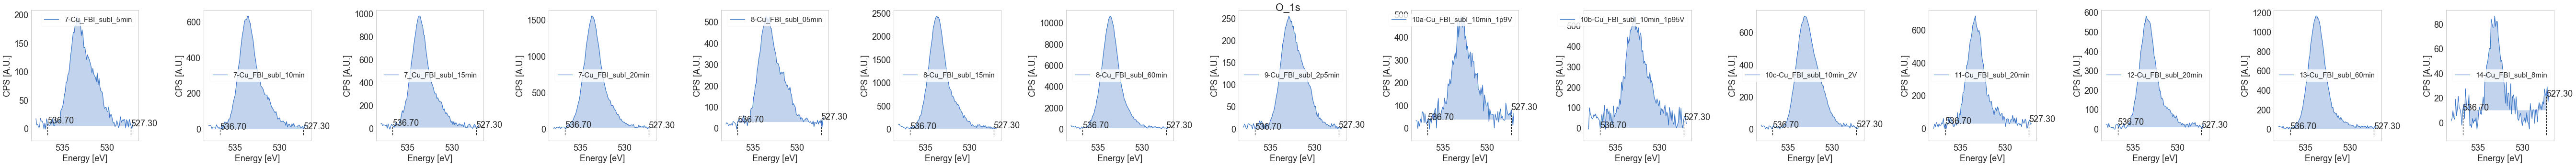

In [79]:
region = 'O_1s'
integrateRegions(fbi_exps, region, indRef=1, asf=asf)

[1665.2806785417374,
 1379.1049983546684,
 3122.9947695456935,
 3399.3383942432592,
 3490.523887669038,
 192.84578243192968]

<Figure size 460.8x403.2 with 0 Axes>

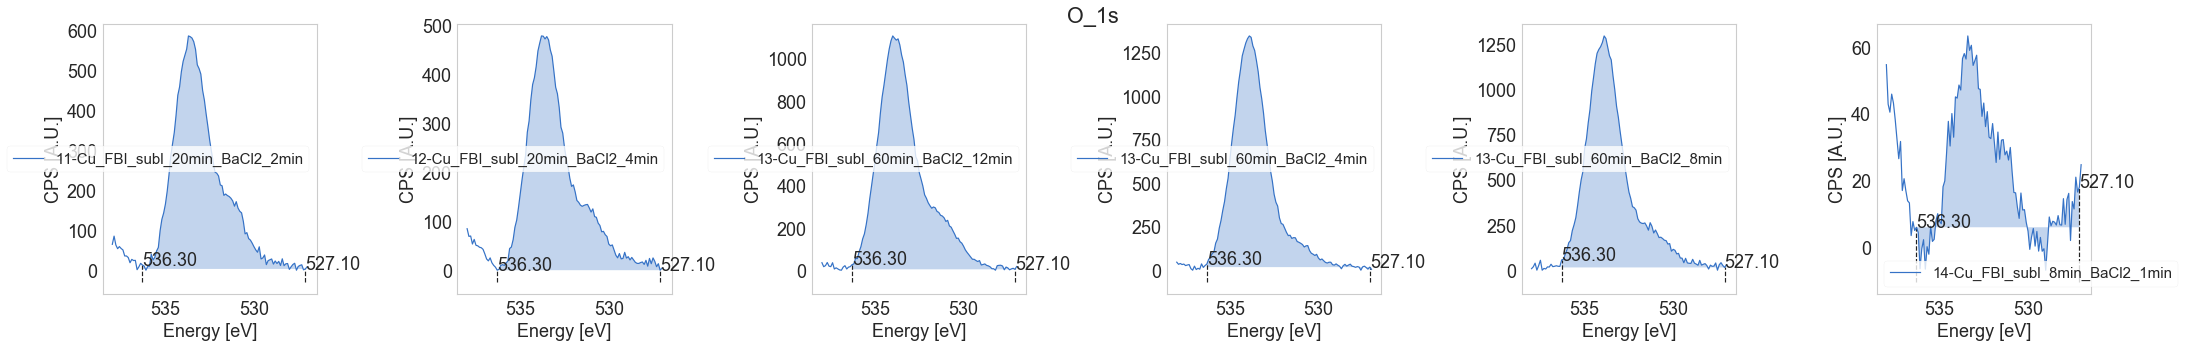

In [108]:
region = 'O_1s'
integrateRegions(ba_exps, region, indRef=1, asf=asf)

### N 1s

[170.22136739507877,
 496.30841468565205,
 714.0551277316491,
 1143.3431827247514,
 492.58670900463795,
 1945.7534164337094,
 8064.060081865117,
 140.43232013049013,
 296.97666925667806,
 470.5628348953818,
 308.9247347110715,
 482.57280231011913,
 337.90329518360255,
 720.0056098610913,
 145.4071092928033]

<Figure size 460.8x403.2 with 0 Axes>

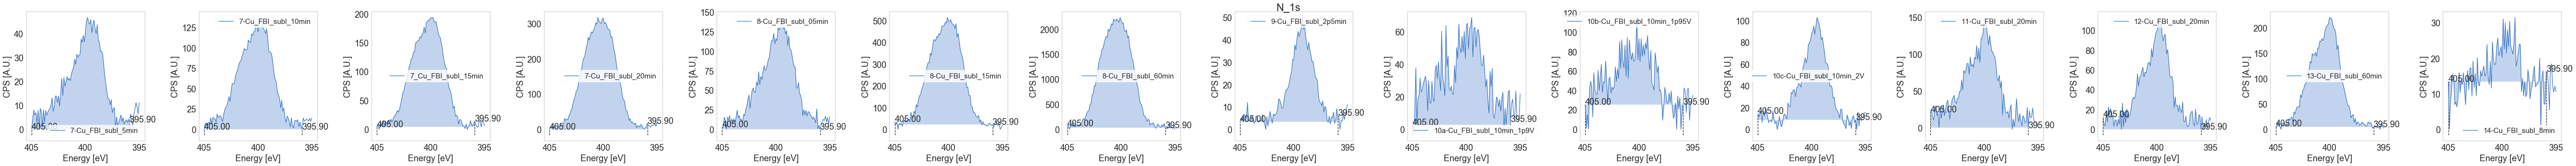

In [109]:
region = 'N_1s'
integrateRegions(fbi_exps, region, indRef=1, asf=asf)

[397.6634092243556,
 346.21900647093213,
 1047.7561816843008,
 933.1207384637414,
 1026.050511507147,
 70.7418886950003]

<Figure size 460.8x403.2 with 0 Axes>

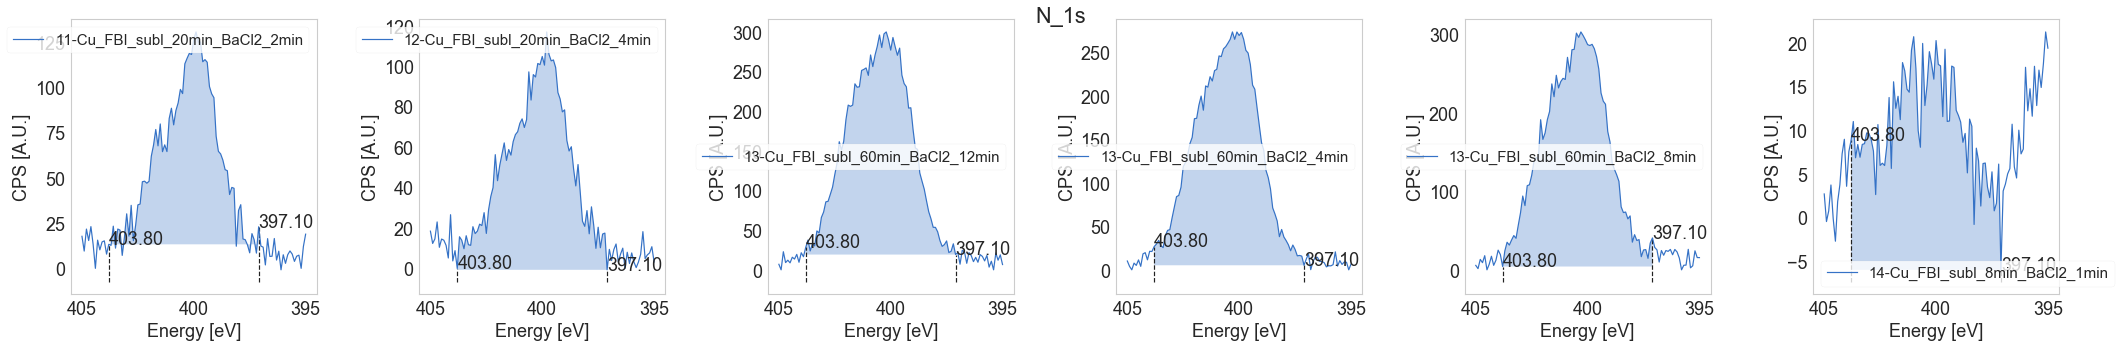

In [110]:
region = 'N_1s'
integrateRegions(ba_exps, region, indRef=1, asf=asf)

### Ba 3d

[1776.8456402043298,
 1910.9669590624717,
 17004.683299062228,
 4562.423258842704,
 11703.855820701236,
 690.8889561844851]

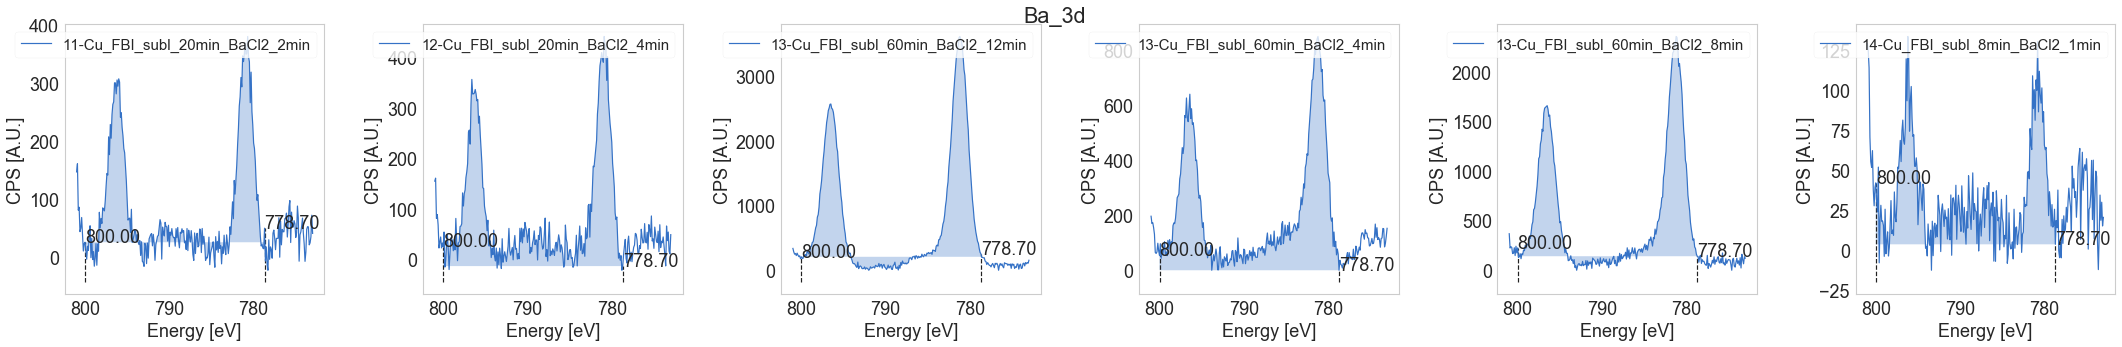

In [111]:
region = 'Ba_3d'
integrateRegions(ba_exps, region, indRef=1, eup=800, edw=778.7, asf=asf, )

### Cl 2p

[333.2887537693527,
 323.0650570047462,
 1004.2975325095013,
 308.51805512264315,
 645.0692816658263,
 115.46950208269642]

<Figure size 460.8x403.2 with 0 Axes>

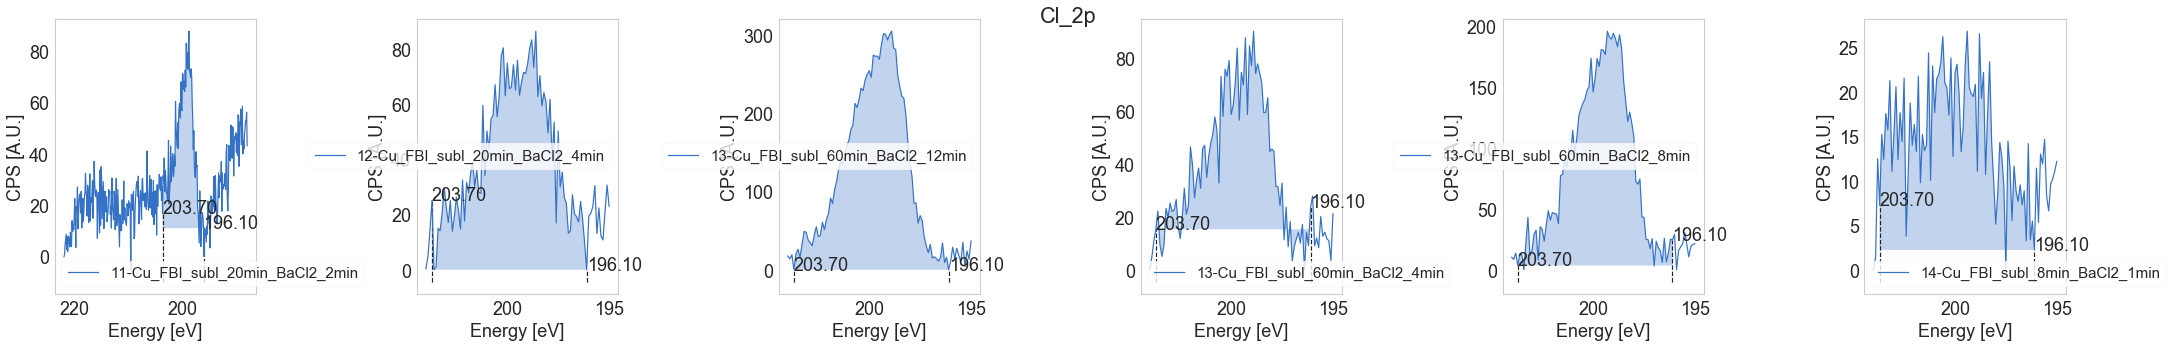

In [112]:
region = 'Cl_2p'
integrateRegions(ba_exps, region, indRef=2, asf=asf)

### Cu 2p

[364602.9658377188,
 363372.3022062575,
 357971.048256062,
 346153.69877035555,
 344297.76554564846,
 334751.50334984483,
 254078.31664290326,
 253098.0530707416,
 248103.5506387627,
 252336.03429878387,
 239384.04402845504,
 244306.1017125554,
 243428.55932917882,
 240585.03770790697]

<Figure size 460.8x403.2 with 0 Axes>

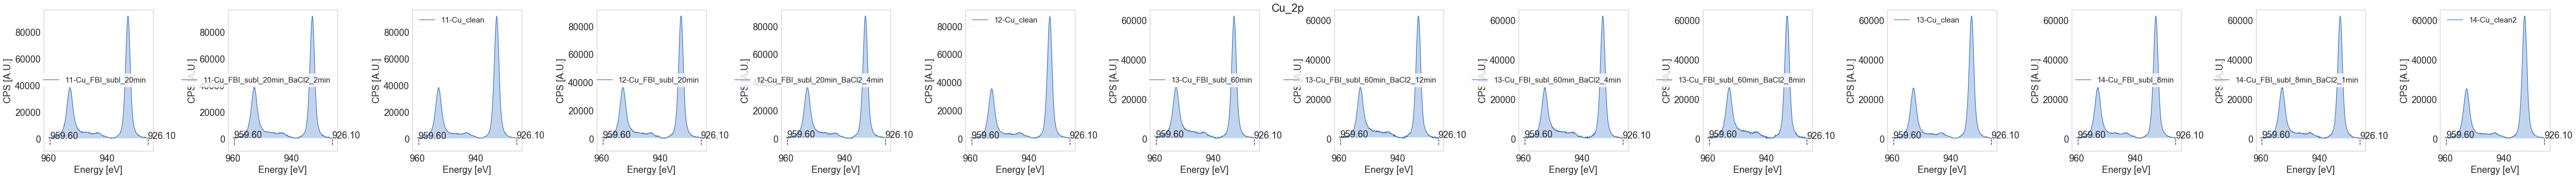

In [87]:
region = 'Cu_2p'
integrateRegions(fbi_exps, region, indRef=0, asf=asf)

# Stoichiometry 

In [93]:
num, denom = (('N_1s', 'C_1s', 'C_1s'), ('O_1s', 'N_1s', 'O_1s'))
make_stoichometry_table(fbi_exps,  num=num, denom=denom, sep=' & ')

Experiment	N_/O_	C_/N_	C_/O_	
7-Cu_FBI_subl_5min & 0.41  &  14.39  &  5.86  &  
7-Cu_FBI_subl_10min & 0.42  &  10.69  &  4.48  &  
7_Cu_FBI_subl_15min & 0.41  &  10.46  &  4.26  &  
7-Cu_FBI_subl_20min & 0.42  &  10.44  &  4.40  &  
8-Cu_FBI_subl_05min & 0.44  &  11.10  &  4.90  &  
8-Cu_FBI_subl_15min & 0.46  &  9.67  &  4.43  &  
8-Cu_FBI_subl_60min & 0.47  &  9.49  &  4.42  &  
9-Cu_FBI_subl_2p5min & 0.27  &  16.92  &  4.52  &  
10a-Cu_FBI_subl_10min_1p9V & 0.28  &  12.82  &  3.59  &  
10b-Cu_FBI_subl_10min_1p95V & 0.40  &  9.36  &  3.77  &  
10c-Cu_FBI_subl_10min_2V & 0.22  &  17.60  &  3.94  &  
11-Cu_FBI_subl_20min & 0.42  &  10.79  &  4.50  &  
12-Cu_FBI_subl_20min & 0.35  &  12.54  &  4.38  &  
13-Cu_FBI_subl_60min & 0.38  &  10.82  &  4.13  &  
14-Cu_FBI_subl_8min & 1.04  &  8.80  &  9.14  &  


In [37]:
print('Nominal')
print('N/O \t C/N \t \t C/O \t Ba/Cl')
print(3/5, '\t', '%.3f'%(31/3), '\t', '%.3f' %(31/5), '\t %.3f' %2 )

Nominal
N/O 	 C/N 	 	 C/O 	 Ba/Cl
0.6 	 10.333 	 6.200 	 2.000


In [113]:
num, denom = (('N_1s', 'C_1s', 'C_1s', 'Ba_3d', 'Cl_2p'), ('O_1s', 'N_1s', 'O_1s', 'N_1s', 'Ba_3d'))
make_stoichometry_table(ba_exps,  num=num, denom=denom, sep=' & ')

Experiment	N_/O_	C_/N_	C_/O_	Ba_/N_	Cl_/Ba_	
11-Cu_FBI_subl_20min_BaCl2_2min & 0.36  &  12.37  &  4.40  &  0.28  &  1.58  &  
12-Cu_FBI_subl_20min_BaCl2_4min & 0.37  &  11.72  &  4.39  &  0.35  &  1.42  &  
13-Cu_FBI_subl_60min_BaCl2_12min & 0.50  &  9.72  &  4.86  &  1.03  &  0.50  &  
13-Cu_FBI_subl_60min_BaCl2_4min & 0.41  &  10.43  &  4.27  &  0.31  &  0.57  &  
13-Cu_FBI_subl_60min_BaCl2_8min & 0.44  &  10.22  &  4.48  &  0.73  &  0.46  &  
14-Cu_FBI_subl_8min_BaCl2_1min & 0.55  &  18.22  &  9.96  &  0.62  &  1.40  &  


In [ ]:
ba2n = [0.28, 0.35, 0.73, 0.62]

In [114]:
Experiment	N_/O_	C_/N_	C_/O_	Ba_/N_	Cl_/Ba_	
\rowcolor{LightCyan}
11-FBI 20min BaCl$_2$ 2min & 0.36  &  12.37  &  4.40  &  0.28  &  1.58  \\
12-FBI 20min BaCl$_2$ 4min & 0.37  &  11.72  &  4.39  &  0.35  &  1.42  \\
\rowcolor{LightCyan}
13-FBI 60min BaCl$_2$ 12min & 0.50  &  9.72  &  4.86  &  1.03  &  0.50  \\
13-FBI 60min BaCl$_2$ 4min & 0.41  &  10.43  &  4.27  &  0.31  &  0.57  \\
\rowcolor{LightCyan}
13-FBI 60min BaCl$_2$ 8min & 0.44  &  10.22  &  4.48  &  0.73  &  0.46  \\
14-FBI 8min BaCl$_2$ 1min & 0.55  &  18.22  &  9.96  &  0.62  &  1.40  \\

SyntaxError: invalid syntax (<ipython-input-114-36938ad3d0fe>, line 1)

In [92]:
num, denom = (('Ba_3d', 'Cl_2p'), ( 'N_1s', 'Ba_3d'))
make_stoichometry_table(ba_exps,  num=num, denom=denom, sep=' & ')

Experiment	Ba_/N_	Cl_/Ba_	
11-Cu_FBI_subl_20min_BaCl2_2min & 0.28  &  1.58  &  
12-Cu_FBI_subl_20min_BaCl2_4min & 0.35  &  1.42  &  
13-Cu_FBI_subl_60min_BaCl2_12min & 1.03  &  0.50  &  
13-Cu_FBI_subl_60min_BaCl2_4min & 0.31  &  0.57  &  
13-Cu_FBI_subl_60min_BaCl2_8min & 0.73  &  0.46  &  
14-Cu_FBI_subl_8min_BaCl2_1min & 0.62  &  1.40  &  


In [23]:
arr = np.array([0.27, 0.34, 0.3, 0.7, 1.01, 0.55])
arr * 3

array([0.81, 1.02, 0.9 , 2.1 , 3.03, 1.65])

# Coverages

In [5]:
path = '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_02_*/**/*.uxy'

files = glob.glob(path, recursive=True)
files.sort()
files_new = []

for f in files:
    if (' ' not in f) and ('/proc' in f) :
        files_new.append(f)
        
files = files_new

files

['/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_02_01_Cu/proc/20210201_11-Cu_FBI_subl_20min.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_02_01_Cu/proc/20210201_11-Cu_FBI_subl_20min_BaCl2_2min.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_02_01_Cu/proc/20210201_11-Cu_clean.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_02_02_Cu/proc/20210202_12-Cu_FBI_subl_20min.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_02_02_Cu/proc/20210202_12-Cu_FBI_subl_20min_BaCl2_4min.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_02_02_Cu/proc/20210202_12-Cu_clean.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_02_03_Cu/proc/20210203_13-Cu_FBI_subl_60min.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_02_03_Cu/proc/20210203_13-Cu_FBI_subl_60min_BaCl2_04min.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_02_03_Cu/proc/20210203_13-Cu_FBI_su

In [6]:
bg_exps = [read_processed_xp(f) for f in files]

In [7]:
len(bg_exps)

14

In [8]:
from invisible_cities.core.system_of_units import nm
thick_fbi = []
thick_ba = []
thick_fbi.append(layer_thickness(xpf=bg_exps[0], xp0=bg_exps[2], region='Cu_2p', mfp=1.86*nm, takeoff = 10))
thick_fbi.append(layer_thickness(xpf=bg_exps[3], xp0=bg_exps[5], region='Cu_2p', mfp=1.86*nm, takeoff = 10))
thick_fbi.append(layer_thickness(xpf=bg_exps[6], xp0=bg_exps[10], region='Cu_2p', mfp=1.86*nm, takeoff = 10))
thick_fbi.append(layer_thickness(xpf=bg_exps[11], xp0=bg_exps[13], region='Cu_2p', mfp=1.86*nm, takeoff = 10))

thick_ba.append(layer_thickness(xpf=bg_exps[1], xp0=bg_exps[2], region='Cu_2p', mfp=1.86*nm, takeoff = 10))
thick_ba.append(layer_thickness(xpf=bg_exps[4], xp0=bg_exps[5], region='Cu_2p', mfp=1.86*nm, takeoff = 10))
thick_ba.append(layer_thickness(xpf=bg_exps[7], xp0=bg_exps[10], region='Cu_2p', mfp=1.86*nm, takeoff = 10))
thick_ba.append(layer_thickness(xpf=bg_exps[8], xp0=bg_exps[10], region='Cu_2p', mfp=1.86*nm, takeoff = 10))
thick_ba.append(layer_thickness(xpf=bg_exps[9], xp0=bg_exps[10], region='Cu_2p', mfp=1.86*nm, takeoff = 10))
thick_ba.append(layer_thickness(xpf=bg_exps[12], xp0=bg_exps[13], region='Cu_2p', mfp=1.86*nm, takeoff = 10))

thickmf = np.matrix(thick_fbi)
thickmba = np.matrix(thick_ba)

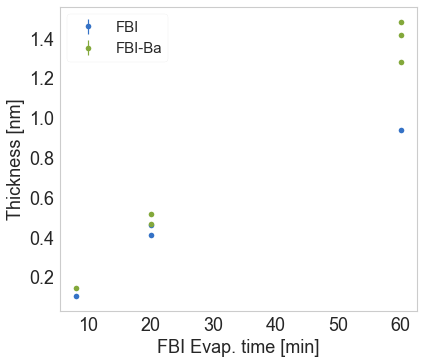

In [12]:
tsubl = [20, 20, 60, 8]
plt.errorbar(x=tsubl, y=thickmf[:,0]/nm, yerr=thickmf[:,1]/nm, fmt='o', label='FBI')

tsubl = [20, 20, 60, 60, 60, 8]
plt.errorbar(x=tsubl, y=thickmba[:,0]/nm, yerr=thickmba[:,1]/nm, fmt='o', label='FBI-Ba')

plt.ylabel('Thickness [nm]')
plt.xlabel('FBI Evap. time [min]')
# plt.title('FBI subl on Cu')
plt.legend()

In [35]:
thickmba/nm

matrix([[0.77908106, 0.00621689],
        [0.70222108, 0.0064233 ],
        [2.23647108, 0.00772405],
        [1.9270192 , 0.0074392 ],
        [2.13176172, 0.00762532],
        [0.22182639, 0.0066586 ]])

### Rate 4x

In [10]:
path = '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_01_*/**/*.uxy'

files = glob.glob(path, recursive=True)
files.sort()
files_new = []

for f in files:
    if (' ' not in f) and ('/proc' in f) :
        files_new.append(f)
        
files = files_new

files

['/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_01_18_Cu/proc/20210119_7-Cu_FBI_subl_05min.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_01_18_Cu/proc/20210119_7-Cu_FBI_subl_10min.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_01_18_Cu/proc/20210119_7-Cu_FBI_subl_15min.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_01_18_Cu/proc/20210119_7-Cu_FBI_subl_20min.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_01_18_Cu/proc/20210119_7-Cu_clean.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_01_21_Cu/proc/20210121_8-Cu_FBI_subl_05min.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_01_21_Cu/proc/20210121_8-Cu_clean.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_01_21_Cu/proc/20210122_8-Cu_FBI_subl_15min.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_01_21_Cu/proc/20210122_8-Cu_FBI_subl_60min.uxy',
 '/Users/pabloherrero/sabat/

In [11]:
rate4 = [read_processed_xp(f) for f in files]

In [7]:
rate4[16].name

'10c-Cu_clean'

In [12]:
from invisible_cities.core.system_of_units import nm
thick_fbi4 = []
thick_cal = []

thick_fbi4.append(layer_thickness(xpf=rate4[0], xp0=rate4[4], region='Cu_2p', mfp=1.86*nm, takeoff = 10))
thick_fbi4.append(layer_thickness(xpf=rate4[1], xp0=rate4[4], region='Cu_2p', mfp=1.86*nm, takeoff = 10))
thick_fbi4.append(layer_thickness(xpf=rate4[2], xp0=rate4[4], region='Cu_2p', mfp=1.86*nm, takeoff = 10))
thick_fbi4.append(layer_thickness(xpf=rate4[3], xp0=rate4[4], region='Cu_2p', mfp=1.86*nm, takeoff = 10))

#8-Cu_clean was measured ungrounded so substitute it by 7-Cu_clean
thick_fbi4.append(layer_thickness(xpf=rate4[5], xp0=rate4[4], region='Cu_2p', mfp=1.86*nm, takeoff = 10))
thick_fbi4.append(layer_thickness(xpf=rate4[7], xp0=rate4[4], region='Cu_2p', mfp=1.86*nm, takeoff = 10))
thick_fbi4.append(layer_thickness(xpf=rate4[8], xp0=rate4[4], region='Cu_2p', mfp=1.86*nm, takeoff = 10))

thick_fbi4.append(layer_thickness(xpf=rate4[9], xp0=rate4[10], region='Cu_2p', mfp=1.86*nm, takeoff = 10))
thickmf4 = np.matrix(thick_fbi4)

thick_cal.append(layer_thickness(xpf=rate4[11], xp0=rate4[12], region='Cu_2p', mfp=1.86*nm, takeoff = 10))
thick_cal.append(layer_thickness(xpf=rate4[13], xp0=rate4[14], region='Cu_2p', mfp=1.86*nm, takeoff = 10))
thick_cal.append(layer_thickness(xpf=rate4[15], xp0=rate4[16], region='Cu_2p', mfp=1.86*nm, takeoff = 10))

thickmfcal = np.matrix(thick_cal)

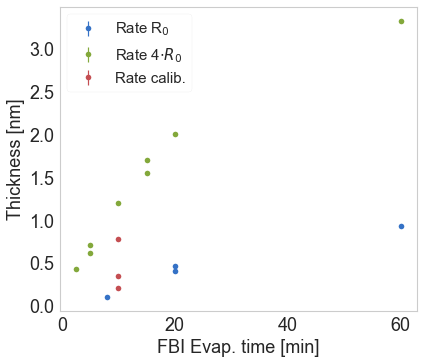

In [17]:
tsubl = [20, 20, 60, 8]
plt.errorbar(x=tsubl, y=thickmf[:,0]/nm, yerr=thickmf[:,1]/nm, fmt='o', label='Rate R$_0$')

tsubl4 = [5, 10, 15, 20, 5, 15, 60, 2.5]
plt.errorbar(x=tsubl4, y=thickmf4[:,0]/nm, yerr=thickmf4[:,1]/nm, fmt='o', label='Rate 4$\cdot R_0$')

tsubl_calib = [10, 10, 10]
plt.errorbar(x=tsubl_calib, y=thickmfcal[:,0]/nm, yerr=thickmfcal[:,1]/nm, fmt='o', label='Rate calib.')


plt.ylabel('Thickness [nm]')
plt.xlabel('FBI Evap. time [min]')
# plt.title('FBI subl on Cu')
plt.legend()
# plt.gcf().savefig('/Users/pabloherrero/Dropbox/phd/papers/fbi_cu_sublim_v2/FBI_thickness.png', dpi=200)

In [22]:
(thickmfcal[:,0]/nm).flatten()

matrix([[0.24877323, 0.93598298, 0.41570307]])

In [ ]:
tazul = [8, 20, 20, 60]  # en min
yazul = [0.12099622, 0.54660844, 0.48295658, 1.10544674]  # en nm

tverde = [5, 10, 15, 20, 5, 15, 60, 2.5] # en min
yverde = [0.74117763, 1.42629936, 1.85479303, 2.3979405 , 0.84283592, 2.02895709, 3.96682544, 0.51512384]  # en nm

trojo = [10, 10, 10]  # en min
yrojo = [0.24877323, 0.93598298, 0.41570307]


In [81]:
rate_ratios = np.array([thickmf4[3]/thickmf[1][0], thickmf4[3][0]/thickmf[0][0], thickmf4[6][0]/thickmf[2][0] ])
rate_ratios

array([[[4.9651265 , 1.00792382]],

       [[4.38694379, 1.04103168]],

       [[3.5884365 , 1.22412397]]])

In [ ]:
np.average(rate_ratios[:,0,0]) ,

### Convert to layer scale

$$ I_f = (1-x)I_0 + x I_0 \exp\left(-\frac{d_A}{L_{TH} \cos\theta} \right), $$

$$ x = \frac{I_f/I_0 - 1}{  \exp\left(-\frac{ d_{ML} }{ L_{TH} \cos\theta }\right) - 1  } $$

In [149]:
def n_layers(xpf: XPS_experiment, xp0: XPS_experiment, r_ml: float, region: str, mfp: float, takeoff: float):
    """
        Estimate number of layers from the attenuation in substrate (region) between an experiment
        with the layer xpf and a reference (clean) experiment xp0. 
        For uncorrected thickness estimation (in nm), use function layer_thickness.
        Parameters:
        ------------
        - xpf: Experiment with substrate CL attenuated by layer.
        - xp0: Clean experiment for reference.
        - r_ml: Size of a Monolayer, in the same units as mfp
            (if the attenuation corresponds to sub-ML regime, correct for bare substrate contribution)
        - region: substrate region.
        - mfp: mean free path of the molecule conforming the layer (use QUASES to compute it).
            NOTE: Use EAL to account for elastic scattering, if negligible use IMFP.
        - takeoff: angle in degrees between the surface normal and the analyser entry.

        Returns:
        layers, dlayers: number layer and associated error
        -----------
    """
    from invisible_cities.core.system_of_units import nm
    If = np.trapz(xpf.dfx[region].dropna().counts, dx=0.1)
    I0 = np.trapz(xp0.dfx[region].dropna().counts, dx=0.1)

    dIf = np.sqrt(If)
    dI0 = np.sqrt(I0)

    costh = np.cos(takeoff*np.pi/180)

    thick = mfp*costh*np.log(I0/If)
    dthick = mfp*costh*np.sqrt((dI0/I0)**2 + (dIf/If)**2)
    
    if thick < r_ml:
        layers = (If/I0 - 1) / (np.exp(- r_ml / costh / mfp) - 1)
        dlayers = layers * np.sqrt( (dIf/If)**2 + (dI0/I0)**2 )
    else:
        layers = thick / r_ml
        dlayers = dthick / r_ml
    return layers, dlayers

def arrange_coverages(experiments: list, inds: list,
                      r_ml: float, region: str, mfp: float, takeoff: float)->np.matrix:
    """Estimate n_layers for a list of experiments following the indices inds
    Parameters:
     - experiments: list of XPS_experiment to look into
     - inds: list of indices. It must be arranged such that each set of measurements
             has its reference (clean substrate) index at the end of each list.
             Example:  inds = [[0,1,2,3,5,7,8, 4], [9, 10]]
             will take experiments[4] as clean_substrate, and compute the thickness of experiments[0],
             experiments[1], experiments[2]... Then it will take experiments[10] as clean_substrate and 
             compute the thickness for experiments[9]
     - all other params must be passed as for n_layers
    Returns:
    layers_res: matrix (M x 2), with column 0 is the mean value of n_layers and column 1 its error, and
    where M is the number of experiments passed for computation.
    """
    layers_res = []
    for lref in inds:
        for li in lref[:-1]:
            layers_res.append(n_layers(xpf=experiments[li], xp0=experiments[lref[-1]], 
                                           r_ml = r_ml, region=region, mfp=mfp, takeoff=takeoff) )
    layers_res = np.matrix(layers_res)
    return layers_res

In [14]:
from invisible_cities.core.system_of_units import nm

inds = [[0, 2], [3,5], [6, 10], [11, 13]]
inds4 = [[0,1,2,3,5,7,8, 4], [9, 10] ]

layers_fbi = arrange_coverages(bg_exps, inds,
                               r_ml = 1.1*nm, region='Cu_2p', mfp = 1.86*nm, takeoff = 10)


layers_fbi4 = arrange_coverages(rate4, inds4,
                                r_ml = 1.1*nm, region='Cu_2p', mfp = 1.86*nm, takeoff = 10)
layers_cal = arrange_coverages(rate4, [[11, 12], [13, 14], [15, 16]],
                               r_ml = 1.1*nm, region='Cu_2p', mfp = 1.86*nm, takeoff = 10)

In [19]:
layers_fbi4

matrix([[6.51323846e-01, 1.16140270e-03],
        [1.08637052e+00, 3.27288126e-03],
        [1.41274162e+00, 3.49811320e-03],
        [1.82644117e+00, 3.82795998e-03],
        [7.24651170e-01, 1.30998972e-03],
        [1.54539729e+00, 3.59823743e-03],
        [3.02141495e+00, 5.11686513e-03],
        [4.75515898e-01, 8.51986016e-04]])

In [18]:
layers_fbi

matrix([[5.01105316e-01, 1.10652374e-03],
        [4.48988260e-01, 1.02400705e-03],
        [8.99023390e-01, 2.25672086e-03],
        [1.21961411e-01, 2.89014747e-04]])

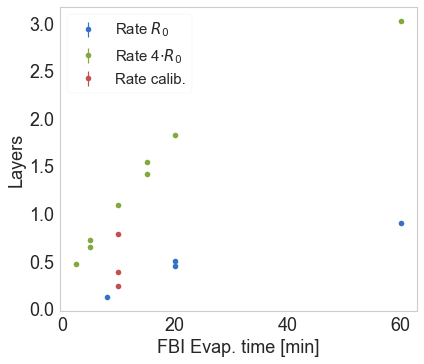

In [85]:
tsubl = [20, 20, 60, 8]
tsubl4 = [5, 10, 15, 20, 5, 15, 60, 2.5]
tcal = [10, 10, 10]
plt.errorbar(x=tsubl, y=layers_fbi[:,0], yerr=layers_fbi[:,1], fmt='o', label='Rate $R_0$')

plt.errorbar(x=tsubl4, y=layers_fbi4[:,0], yerr=layers_fbi4[:,1], fmt='o', label='Rate 4$\cdot R_0$')
plt.errorbar(x=tcal, y=layers_cal[:,0], yerr=layers_cal[:,1], fmt='o', label='Rate calib.')

plt.ylabel('Layers')
plt.xlabel('FBI Evap. time [min]')
plt.legend()
# plt.gcf().savefig('/Users/pabloherrero/Dropbox/phd/papers/fbi_cu_sublim_v2/FBI_thickness.png', dpi=200)

### Estimate $R_0$

In [20]:
1/60*0.022/1.1 * 1e6/3.8

87.71929824561401

In [13]:
0.022/60

0.00036666666666666667

In [8]:
0.022*50/334

0.003293413173652694

In [9]:
import numpy as np

In [15]:
np.pi * 4 * (1.1/2)**2

3.8013271108436504

In [137]:
r0 = []
for i, th in enumerate(thickmf[:,0]):
    r0.append(th/nm/tsubl[i])
    
np.average(r0), np.std(r0) # in nm/min

(0.021917619832435533, 0.004914634810493144)

### Estimate R1 = 4.3·R$_0$

In [138]:
np.average(rate_ratios[:,0,0]) * np.average(r0), np.average(rate_ratios[:,0,0]) * np.std(r0), 

(0.09454170270840903, 0.021199288368275775)

In [139]:
for i, th in enumerate(thickmfcal[:,0]):
    print(th/nm/tsubl_calib[i])
    

[[0.02565079]]
[[0.09650838]]
[[0.04286278]]


# Check expected attenuation in O, N and C 1s from BaCl2 deposition

## Plot progba set

In [168]:
plt.rcParams['lines.linewidth'] = 2.5

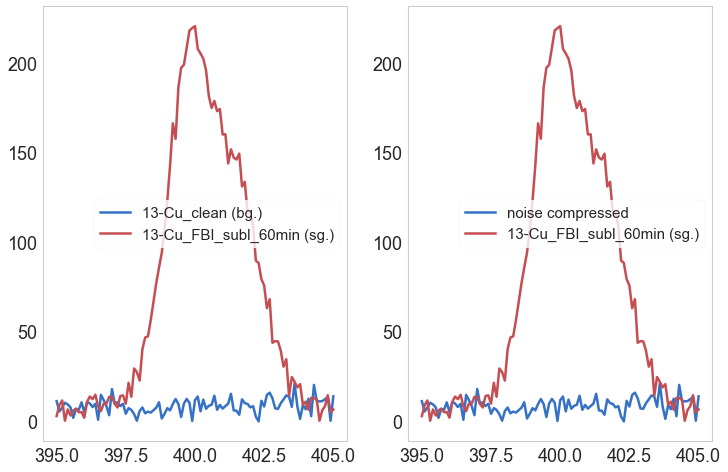

In [171]:
compress_noisy_region(bg_exps[10], bg_exps[6], 'N_1s', inplace=True);

In [180]:
bg_exps[6].color = 'g'
bg_exps[7].color = 'b'
bg_exps[10].color = 'y'

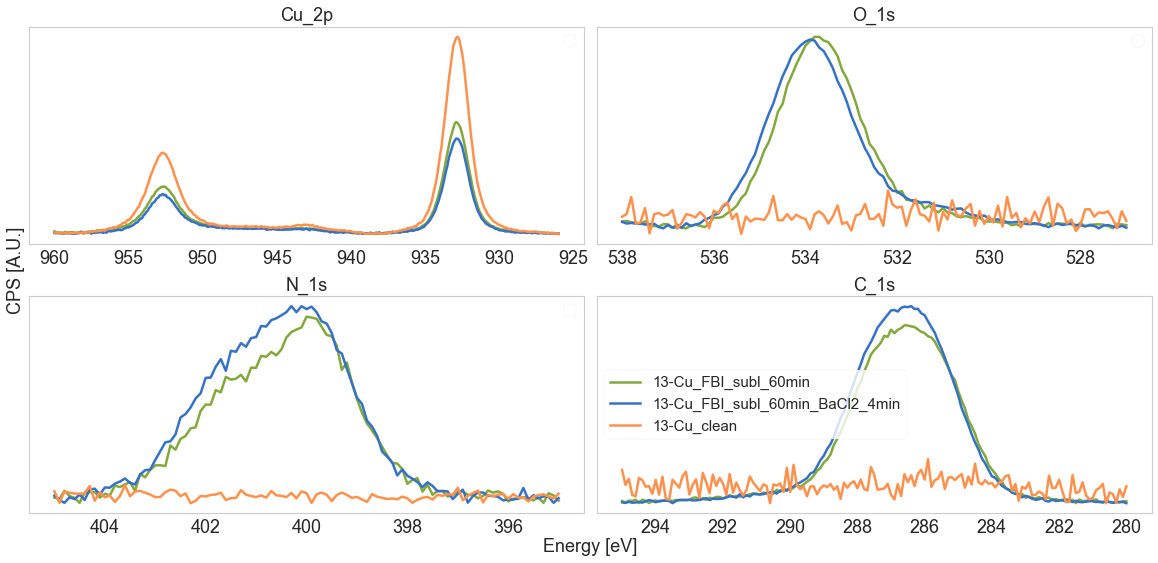

In [182]:
ax = plot_xp_regions(bg_exps[6:8]+[bg_exps[10]], regions=['Cu_2p', 'O_1s', 'N_1s', 'C_1s'], ncols=2)
# ax[0][0].set(ylim=(0, ax[0][0].get_ylim()[1]*0.65))
ax[0][0].legend()

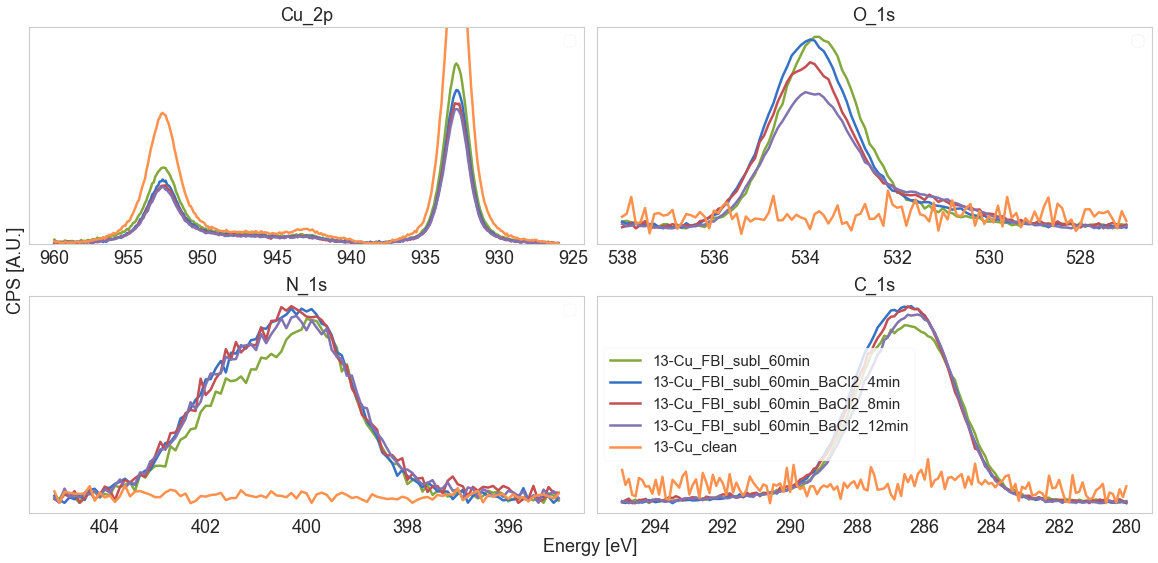

In [183]:
ax = plot_xp_regions(bg_exps[6:11], regions=['Cu_2p', 'O_1s', 'N_1s', 'C_1s'], ncols=2)
ax[0][0].set(ylim=(0, ax[0][0].get_ylim()[1]*0.65))
ax[0][0].legend()

## Thickness from Cu 2p attenuation
EAL for Cu 2p through BaCl$_2$ = 1.36 nm

For a system with a substrate and two independent overlayers (I: interlayer, T: top layer), we expect the attenuation of substrate (Cu 2p) core level intensity to be:
$$ I_f = I_0 \exp\left(-\frac{d_I }{ L_I  \cos\theta} \right) \exp\left(-\frac{d_T }{ L_T  \cos\theta} \right) = $$
$$ I_f = I_I \exp\left(-\frac{d_T }{ L_T  \cos\theta} \right), $$
where $I_I = I_0 \exp\left(-\frac{d_I}{L_I \cos\theta} \right),$ is the intensity of the Cu 2p CL measured with interlayer (FBI) attenuation.


In [ ]:
(dI LT + dT LI) / LI LT costh

In [150]:
progba = []
thickFBI60 = layer_thickness(xpf=bg_exps[6], xp0=bg_exps[10], region='Cu_2p', mfp=1.86*nm, takeoff=10)
progba.append(layer_thickness(xpf=bg_exps[7], xp0=bg_exps[6], region='Cu_2p', mfp=1.36*nm, takeoff = 10))
progba.append(layer_thickness(xpf=bg_exps[8], xp0=bg_exps[6], region='Cu_2p', mfp=1.36*nm, takeoff = 10))
progba.append(layer_thickness(xpf=bg_exps[9], xp0=bg_exps[6], region='Cu_2p', mfp=1.36*nm, takeoff = 10))

progba

[(2.470515463624076e-07, 3.940742070916728e-09),
 (3.452528325520955e-07, 4.021750923585e-09),
 (3.954749044619526e-07, 4.06486156055328e-09)]

## Compute attenuation factor for O 1s:

$$ \frac{I_f}{I_0} = \exp\left(-\frac{d_{BaCl_2}}{\lambda_{O1s} \cos\theta} \right) $$

### IMFP for O 1s through BaCl$_2$
$\lambda_{in} $ = 22.04 Å

In [151]:
BE_N = 534 # eV
hv = 1486.6
KE_N = hv - BE_N
KE_N

952.5999999999999

In [186]:
imfp = 2.20 * nm

attFact = []
costh = np.cos(takeoff*np.pi/180)
for thick in progba:
    attFact.append(np.exp(-thick[0]/imfp*costh))

attFact

[0.8953056358096017, 0.8568015599305181, 0.8377543651330644]

In [134]:
trim_spectra(bg_exps[10], xpRef=bg_exps[7], region=region, inplace=True);

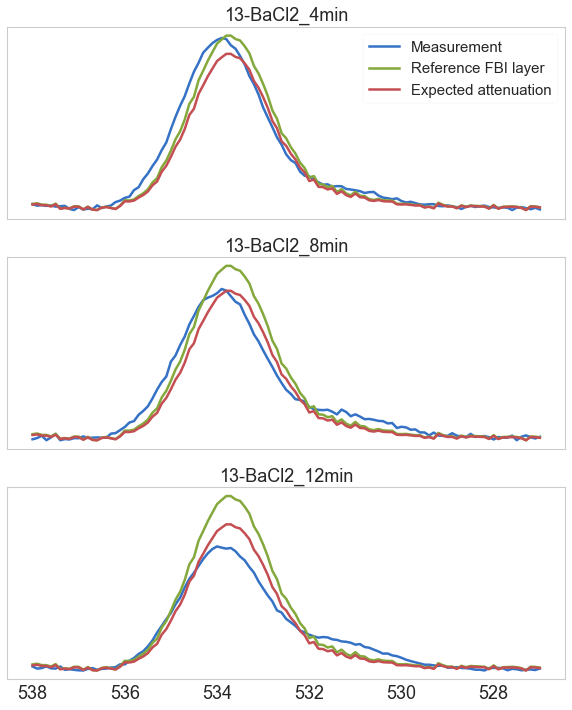

In [188]:
region = 'O_1s'
xp0 = bg_exps[6]
x = xp0.dfx[region].dropna().energy
y0 = xp0.dfx[region].dropna().counts

fig, ax = plt.subplots(3, sharex=True, figsize=(10, 12))

for i, xp in enumerate(bg_exps[7:10]):
    y = xp.dfx[region].dropna().counts
    yexp = y0*attFact[i]
    
    ax[i].plot(x, y, label='Measurement')
    ax[i].plot(x, y0, label='Reference FBI layer')
    ax[i].plot(x, yexp, label='Expected attenuation')  
    ax[i].set(yticks=[], title=xp.name.replace('Cu_FBI_subl_60min_', ''))
    ax[i].invert_xaxis()
ax[0].legend()

## Compute attenuation factor for N 1s:

$$ \frac{I_f}{I_0} = \exp\left(-\frac{d_{BaCl_2}}{\lambda_{N1s} \cos\theta} \right) $$

### IMFP for N 1s through BaCl$_2$
$\lambda_{in} $ = 24.40 Å

In [156]:
BE_N = 400 # eV
hv = 1486.6
KE_N = hv - BE_N
KE_N

1086.6

In [161]:
imfp = 2.44 * nm

attFact = []
costh = np.cos(takeoff*np.pi/180)
for thick in progba:
    attFact.append(np.exp(-thick[0]/imfp*costh))

attFact

[0.9050976784482725, 0.8699257600943503, 0.8524697781304917]

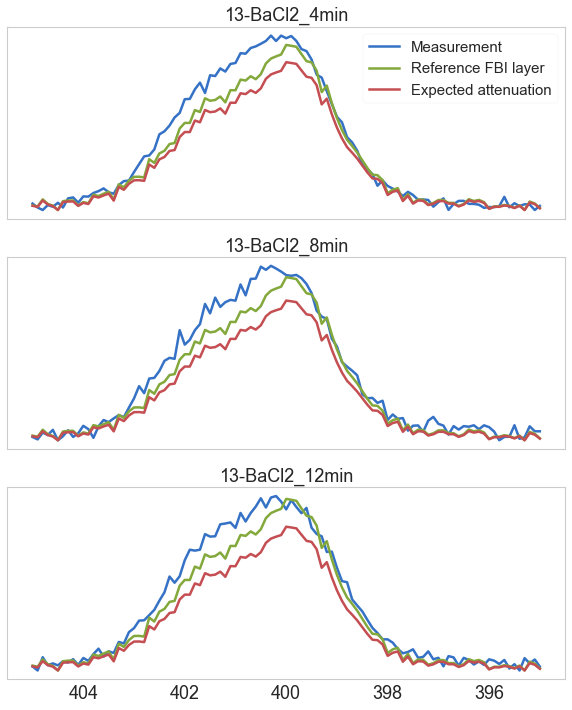

In [189]:
region = 'N_1s'
xp0 = bg_exps[6]
x = xp0.dfx[region].dropna().energy
y0 = xp0.dfx[region].dropna().counts

fig, ax = plt.subplots(3, sharex=True, figsize=(10, 12))

for i, xp in enumerate(bg_exps[7:10]):
    y = xp.dfx[region].dropna().counts
    yexp = y0*attFact[i]
    
    ax[i].plot(x, y, label='Measurement')
    ax[i].plot(x, y0, label='Reference FBI layer')
    ax[i].plot(x, yexp, label='Expected attenuation')  
    ax[i].set(yticks=[], title=xp.name.replace('Cu_FBI_subl_60min_', ''))
    ax[i].invert_xaxis()
ax[0].legend()

## Compute attenuation factor for C 1s:

$$ \frac{I_f}{I_0} = \exp\left(-\frac{d_{BaCl_2}}{\lambda_{C1s} \cos\theta} \right) $$

### IMFP for C 1s through BaCl$_2$
$\lambda_{in} $ = 24.40 Å

In [109]:
BE_N = 286 # eV
hv = 1486.6
KE_N = hv - BE_N
KE_N

1200.6

In [163]:
imfp = 2.63 * nm

attFact = []
costh = np.cos(takeoff*np.pi/180)
for thick in progba:
    attFact.append(np.exp(-thick[0]/imfp*costh))

attFact

[0.9116411419509397, 0.8787274642132523, 0.8623567614891514]

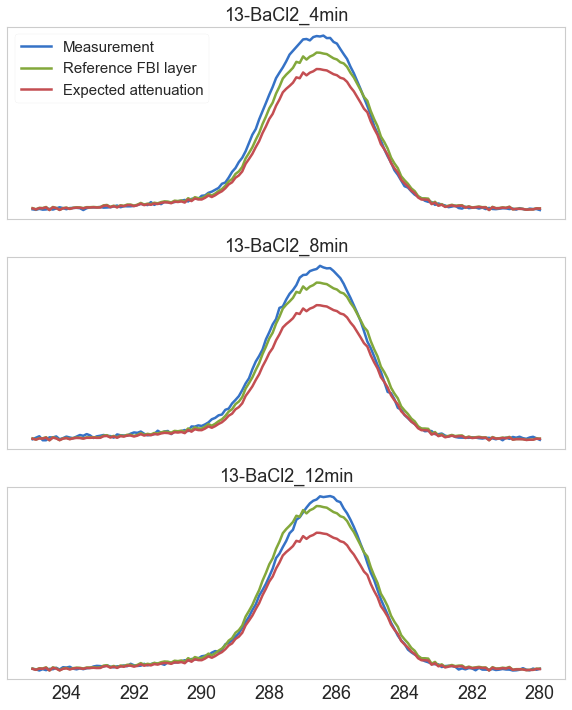

In [190]:
region = 'C_1s'
xp0 = bg_exps[6]
x = xp0.dfx[region].dropna().energy
y0 = xp0.dfx[region].dropna().counts

fig, ax = plt.subplots(3, sharex=True, figsize=(10, 12))

for i, xp in enumerate(bg_exps[7:10]):
    y = xp.dfx[region].dropna().counts
    yexp = y0*attFact[i]
    
    ax[i].plot(x, y, label='Measurement')
    ax[i].plot(x, y0, label='Reference FBI layer')
    ax[i].plot(x, yexp, label='Expected attenuation')  
    ax[i].set(yticks=[], title=xp.name.replace('Cu_FBI_subl_60min_', ''))
    ax[i].invert_xaxis()
ax[0].legend()